<a href="https://colab.research.google.com/github/ibonetc/DataAnalytics_Text/blob/master/DA_ScrapingTwitter_snscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.12


In [ ]:
#!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
!pip install snscrape

In [ ]:
import os
import pandas as pd
from datetime import date

In [ ]:
today = date.today()
end_date = today
end_date

datetime.date(2022, 3, 9)

In [ ]:
search = 'covid-19'
from_date = '2019-01-01'

In [ ]:
os.system(f"snscrape --since {from_date} twitter-search '{search} until:{end_date}' > result-tweets.txt")

2

In [ ]:
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

Number Of Tweets : 2647


In [ ]:
df

,link
0,https://twitter.com/TELEMUNDO52/status/1501347...
1,https://twitter.com/kdawg0113/status/150134700...
2,https://twitter.com/hailetsion21/status/150134...
3,https://twitter.com/cafe_aeroporto/status/1501...
4,https://twitter.com/MuneageDaydream/status/150...
...,...
2642,https://twitter.com/IndustrialNBC/status/15013...
2643,https://twitter.com/jondknight/status/15013294...
2644,https://twitter.com/AndyVermaut/status/1501329...
2645,https://twitter.com/michaelkhalsat1/status/150...


## Extraer tweets

In [ ]:
max_results=1000
from_date = '2021-01-01'

In [ ]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

(0, "'El concejo municipal pretende explorar la eliminación gradual de los programas y políticas temporales vigentes por el COVID-19. https://t.co/5RCuGPdzDi'")
(1, "@CrnchyMama @MCPS @mocoboe I'm not sure it will help much, but I can tell you that every person at my school who got Covid19 in December wore cloth or surgical masks. Not one single person who wore KN95 or KF94 got sick regardless of proximity or time with positive people. Idk how your kid will eat.")
(2, "'Sanctions kill way more people than COVID-19. https://t.co/WTexTdMYRN'")
(3, "'La francia sospende il pass vacinale per il COVID19 - Greenpass - dal 14 Marzo  https://t.co/QDITXHhGFf'")
(4, '\'The overall attitude has become "if we pretend things are back to normal')
(5, "People's Convoy update:\\nThey drove around the beltway for a second day in a row but have not entered the city for strategic reasons. \\n\\nTruck organizers will be meeting with Senator Ron Johnson and possibly Ted Cruz tomorrow. \\nThe protesters goa

In [ ]:
df

,content
0,'El concejo municipal pretende explorar la eli...
1,@CrnchyMama @MCPS @mocoboe I'm not sure it wil...
2,'Sanctions kill way more people than COVID-19....
3,'La francia sospende il pass vacinale per il C...
4,"'The overall attitude has become ""if we preten..."
...,...
989,'As the prolonged COVID-19 pandemic has slashe...
990,'Colombia entró en lista de países con menor a...
991,'Colombia entró en lista de países con menor a...
992,'DESDE SEMPRE EU VINHA DIZENDO


## Usar función TwitterSearchScraper para una búsqueda avanzada

Ver: https://github.com/igorbrigadir/twitter-advanced-search para más detalle de cómo hacer la consulta

In [ ]:
!pip install snscrape

In [ ]:
import snscrape.modules.twitter as sntwitter
import itertools
import os
import pandas as pd
from datetime import date

In [ ]:
search = 'covid-19'

In [ ]:
scraped_tweets = sntwitter.TwitterSearchScraper(search).get_items()

In [ ]:
scraped_tweets

<generator object TwitterSearchScraper.get_items at 0x7f230f41bf50>

In [ ]:
sliced_scraped_tweets = itertools.islice(scraped_tweets, 2000)

In [ ]:
df=pd.DataFrame(sliced_scraped_tweets)
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/PortalMPA/status/150165642...,2022-03-09 20:29:26+00:00,Divinópolis tem novos 1228 casos de Covid-19 a...,1501656429832384512,PortalMPA,[https://www.sistemampa.com.br/noticias/saude/...,https://www.sistemampa.com.br/noticias/saude/d...,[https://t.co/IzC7t43xfc],https://t.co/IzC7t43xfc
1,https://twitter.com/Jimenahdezv/status/1501656...,2022-03-09 20:29:26+00:00,@MinSaludCol Las eps ya no hacen pruebas covid...,1501656428611788805,Jimenahdezv,[],,[],
2,https://twitter.com/francklyspoken/status/1501...,2022-03-09 20:29:23+00:00,@nonamerule1 @Chris07479124 @LhedgehogF @RockL...,1501656415873687561,francklyspoken,[],,[],
3,https://twitter.com/kamelfekir1/status/1501656...,2022-03-09 20:29:23+00:00,"Unable to sue, Michigan woman files claim in h...",1501656413495566339,kamelfekir1,[https://promoteyourarticles.com/unable-to-sue...,https://promoteyourarticles.com/unable-to-sue-...,[https://t.co/9ocSN5wf7H],https://t.co/9ocSN5wf7H
4,https://twitter.com/AWayHomeWA/status/15016564...,2022-03-09 20:29:22+00:00,"As we mark 2 years since COVID-19 hit, we reco...",1501656409565392909,AWayHomeWA,[https://bit.ly/35CXWKo],https://bit.ly/35CXWKo,[https://t.co/aAfWNGO0h1],https://t.co/aAfWNGO0h1
...,...,...,...,...,...,...,...,...,...
1995,https://twitter.com/DQuotidiana/status/1501646...,2022-03-09 19:51:02+00:00,La guerra in Ucraina: la quattordicesima giorn...,1501646765786865664,DQuotidiana,[https://dissidenzaquotidiana.it/la-guerra-in-...,https://dissidenzaquotidiana.it/la-guerra-in-u...,[https://t.co/shjaj19WFo],https://t.co/shjaj19WFo
1996,https://twitter.com/DCSD_SC/status/15016467642...,2022-03-09 19:51:02+00:00,DCSD invites the public to open house drop-ins...,1501646764276912136,DCSD_SC,[http://www.darlington.k12.sc.us/about_us/late...,http://www.darlington.k12.sc.us/about_us/lates...,[https://t.co/qJjmlej5jV],https://t.co/qJjmlej5jV
1997,https://twitter.com/Llort37379701/status/15016...,2022-03-09 19:51:01+00:00,Seeeeeeeee!!!! Ya está aquí!! DELTACRON!! Nos ...,1501646760703320064,Llort37379701,[https://www.sport.es/es/noticias/internaciona...,https://www.sport.es/es/noticias/internacional...,[https://t.co/5RRhnf5Ezi],https://t.co/5RRhnf5Ezi
1998,https://twitter.com/pacesartupy/status/1501646...,2022-03-09 19:51:01+00:00,@neuzaortiz Nossa GRANA! (o famigerado Fundo P...,1501646759218589703,pacesartupy,[],,[],


In [ ]:
df.columns

Index(['url', 'date', 'content', 'id', 'username', 'outlinks', 'outlinksss',
       'tcooutlinks', 'tcooutlinksss'],
      dtype='object')

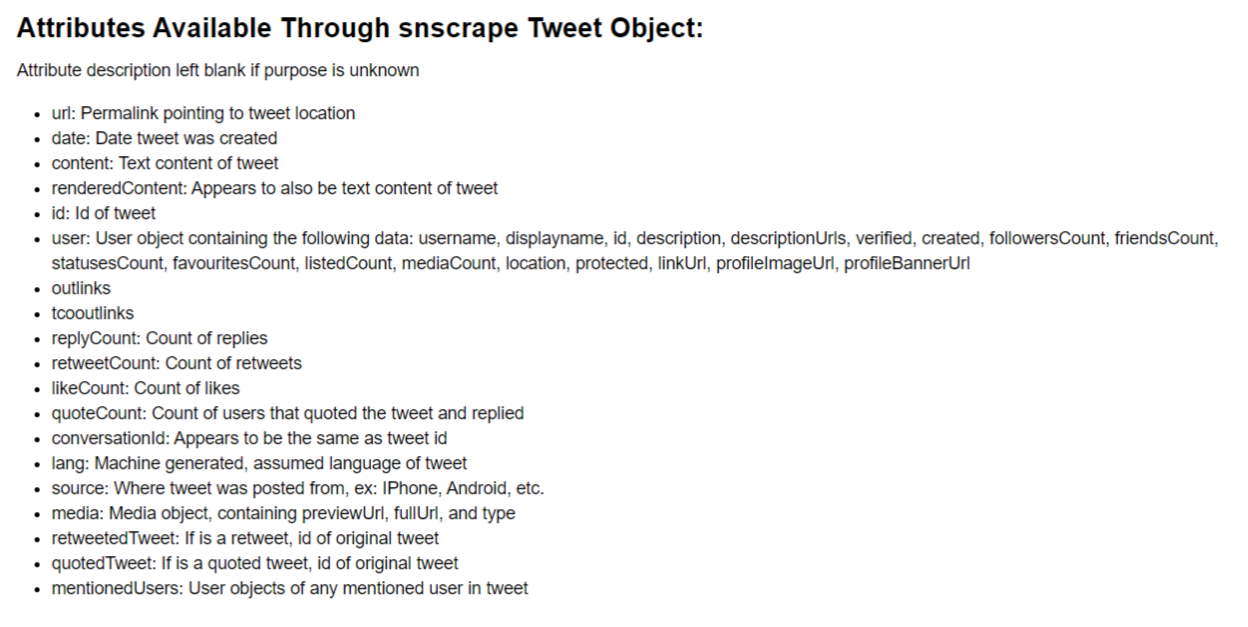

In [ ]:
list1 = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('covid lang:es filter:hashtags').get_items()):
  if i > 100:
    break
  list1.append([tweet.date, tweet.id, tweet.content, tweet.username])

In [ ]:
df_1=pd.DataFrame(list1,columns=['Datetime', 'Tweet_id', 'Text', 'Username'])

In [ ]:
df_1

,Datetime,Tweet_id,Text,Username
0,2022-03-09 20:30:05+00:00,1501656592776839169,VACUNACIÓN COVID-19 | Casas Nóblega solicitó a...,hoydiacordoba
1,2022-03-09 20:30:01+00:00,1501656572677795841,#SabíasQue| Aceite de oliva: oro líquido para ...,ElCandelazoNews
2,2022-03-09 20:30:00+00:00,1501656571561984002,"#NOTICIAS || COVID-19: El 90,12% de la poblaci...",RadioUCentralCL
3,2022-03-09 20:30:00+00:00,1501656570819530756,Colombia entra en ciclo electoral con la sombr...,globovision
4,2022-03-09 20:30:00+00:00,1501656569649324038,La vacuna vegetal contra el Covid tiene 71% de...,LagartoShowOk
...,...,...,...,...
96,2022-03-09 20:04:00+00:00,1501650026614837248,La Cámara de Diputados aprobó el Proyecto de L...,npyoficial
97,2022-03-09 20:03:41+00:00,1501649947501936647,#VACÚNATE 💉\nComunicado sobre el proceso de va...,lacentralec
98,2022-03-09 20:03:27+00:00,1501649887175323649,🔴 IMPORTANTE | 💉Vacunarán contra COVID-19 a re...,Cabildo_mx
99,2022-03-09 20:03:13+00:00,1501649829113516034,#México: México registró 265 muertos por Covid...,lado_mx


In [ ]:
df_covid_en = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper('covid lang:en').get_items(), 50))
df_covid_en

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/LegalRealEstate/status/150...,2022-03-09 20:43:27+00:00,Frustration and rent abatement in commercial l...,1501659953450270720,LegalRealEstate,[https://www.jdsupra.com/legalnews/frustration...,https://www.jdsupra.com/legalnews/frustration-...,[https://t.co/tUKF3JR4Cm],https://t.co/tUKF3JR4Cm
1,https://twitter.com/BizAdvisories/status/15016...,2022-03-09 20:38:17+00:00,Frustration and rent abatement in commercial l...,1501658653094342660,BizAdvisories,[https://www.jdsupra.com/legalnews/frustration...,https://www.jdsupra.com/legalnews/frustration-...,[https://t.co/ze3AumPsc9],https://t.co/ze3AumPsc9
2,https://twitter.com/Kuifjesdream/status/150133...,2022-03-08 23:09:15+00:00,@HoeyberghsJeff Net covid gehad (eindelijk). 2...,1501334259247763466,Kuifjesdream,[],,[],
3,https://twitter.com/Legal_Alerts/status/150035...,2022-03-06 06:06:51+00:00,"Sanctions, COVID and Inflation: Need a Crystal...",1500352188920438784,Legal_Alerts,[https://www.jdsupra.com/legalnews/sanctions-c...,https://www.jdsupra.com/legalnews/sanctions-co...,[https://t.co/4IbaWaXa7Q],https://t.co/4IbaWaXa7Q
4,https://twitter.com/Legal_Alerts/status/149969...,2022-03-04 10:23:31+00:00,Corbin &amp; King: Denial of Access clause and...,1499692004145451008,Legal_Alerts,[https://www.jdsupra.com/legalnews/corbin-king...,https://www.jdsupra.com/legalnews/corbin-king-...,[https://t.co/tQusmNc9iy],https://t.co/tQusmNc9iy
5,https://twitter.com/HeadFearless/status/149965...,2022-03-04 07:41:03+00:00,"&lt;blockquote class=""twitter-tweet""&gt;&lt;p ...",1499651117390651393,HeadFearless,[https://twitter.com/Orwells_Ghost_/status/149...,https://twitter.com/Orwells_Ghost_/status/1499...,[https://t.co/uTiZknUkbQ],https://t.co/uTiZknUkbQ
6,https://twitter.com/Insurance_Alert/status/149...,2022-03-03 21:39:06+00:00,Corbin &amp; King: Denial of Access clause and...,1499499633139019779,Insurance_Alert,[https://www.jdsupra.com/legalnews/corbin-king...,https://www.jdsupra.com/legalnews/corbin-king-...,[https://t.co/Ub5UkIWUij],https://t.co/Ub5UkIWUij
7,https://twitter.com/MarjoleinRth/status/149891...,2022-03-02 07:09:21+00:00,@rechtsehippie @ministerVWS @2eKamertweets @Pi...,1498918366085586944,MarjoleinRth,[],,[],
8,https://twitter.com/LegalNews/status/149879673...,2022-03-01 23:06:01+00:00,"Sanctions, COVID and Inflation: Need a Crystal...",1498796732028649473,LegalNews,[https://www.jdsupra.com/legalnews/sanctions-c...,https://www.jdsupra.com/legalnews/sanctions-co...,[https://t.co/VpB7LSgrhz],https://t.co/VpB7LSgrhz
9,https://twitter.com/LawAnalysis/status/1498760...,2022-03-01 20:42:01+00:00,"Sanctions, COVID and Inflation: Need a Crystal...",1498760490687762434,LawAnalysis,[https://www.jdsupra.com/legalnews/sanctions-c...,https://www.jdsupra.com/legalnews/sanctions-co...,[https://t.co/968dEfmf06],https://t.co/968dEfmf06


In [ ]:
df_covid_en["Language"]="en"

In [ ]:
df_covid_en.head()

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,Language
0,https://twitter.com/LegalRealEstate/status/150...,2022-03-09 20:43:27+00:00,Frustration and rent abatement in commercial l...,1501659953450270720,LegalRealEstate,[https://www.jdsupra.com/legalnews/frustration...,https://www.jdsupra.com/legalnews/frustration-...,[https://t.co/tUKF3JR4Cm],https://t.co/tUKF3JR4Cm,en
1,https://twitter.com/BizAdvisories/status/15016...,2022-03-09 20:38:17+00:00,Frustration and rent abatement in commercial l...,1501658653094342660,BizAdvisories,[https://www.jdsupra.com/legalnews/frustration...,https://www.jdsupra.com/legalnews/frustration-...,[https://t.co/ze3AumPsc9],https://t.co/ze3AumPsc9,en
2,https://twitter.com/Kuifjesdream/status/150133...,2022-03-08 23:09:15+00:00,@HoeyberghsJeff Net covid gehad (eindelijk). 2...,1501334259247763466,Kuifjesdream,[],,[],,en
3,https://twitter.com/Legal_Alerts/status/150035...,2022-03-06 06:06:51+00:00,"Sanctions, COVID and Inflation: Need a Crystal...",1500352188920438784,Legal_Alerts,[https://www.jdsupra.com/legalnews/sanctions-c...,https://www.jdsupra.com/legalnews/sanctions-co...,[https://t.co/4IbaWaXa7Q],https://t.co/4IbaWaXa7Q,en
4,https://twitter.com/Legal_Alerts/status/149969...,2022-03-04 10:23:31+00:00,Corbin &amp; King: Denial of Access clause and...,1499692004145451008,Legal_Alerts,[https://www.jdsupra.com/legalnews/corbin-king...,https://www.jdsupra.com/legalnews/corbin-king-...,[https://t.co/tQusmNc9iy],https://t.co/tQusmNc9iy,en


In [ ]:
df_covid_es = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper("covid lang:es").get_items(), 50))
df_covid_es

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/metricaempresa1/status/150...,2022-03-10 00:05:07+00:00,Austria suspende la ley que obligaba a vacunar...,1501710705791275010,metricaempresa1,[https://www.elmundo.es/internacional/2022/03/...,https://www.elmundo.es/internacional/2022/03/0...,[https://t.co/WKJFu6t7f4],https://t.co/WKJFu6t7f4
1,https://twitter.com/reperfilar/status/15017106...,2022-03-10 00:05:00+00:00,#COVID19 | En Argentina se registraron 6.096 c...,1501710676229701633,reperfilar,[],,[],
2,https://twitter.com/OficialMiBus/status/150171...,2022-03-10 00:04:59+00:00,@edwivan @elmetrodepanama @NitoCortizo @tvnnot...,1501710672010305539,OficialMiBus,[],,[],
3,https://twitter.com/YanieYampier/status/150171...,2022-03-10 00:04:55+00:00,@htjlaw No sabía a nada. Después del covid me ...,1501710655115915265,YanieYampier,[],,[],
4,https://twitter.com/rcnradio/status/1501710639...,2022-03-10 00:04:51+00:00,Tratamiento oral Molnupiravir contra la covid-...,1501710639613501444,rcnradio,[https://www.rcnradio.com/salud/quienes-pueden...,https://www.rcnradio.com/salud/quienes-pueden-...,[https://t.co/nTmIJTJXC9],https://t.co/nTmIJTJXC9
5,https://twitter.com/agenciaNDS/status/15017106...,2022-03-10 00:04:47+00:00,Las personas con síndrome de Down son genética...,1501710622232236033,agenciaNDS,[https://bit.ly/2MLVl7a],https://bit.ly/2MLVl7a,[https://t.co/hg2rs2sJB5],https://t.co/hg2rs2sJB5
6,https://twitter.com/DCNhoy/status/150171062075...,2022-03-10 00:04:47+00:00,Las personas con síndrome de Down son genética...,1501710620751642625,DCNhoy,[https://bit.ly/2MLVl7a],https://bit.ly/2MLVl7a,[https://t.co/SJxCwp66UN],https://t.co/SJxCwp66UN
7,https://twitter.com/DiarioContraste/status/150...,2022-03-10 00:04:46+00:00,Las personas con síndrome de Down son genética...,1501710619271057409,DiarioContraste,[https://bit.ly/2MLVl7a],https://bit.ly/2MLVl7a,[https://t.co/6nRl8bOPB8],https://t.co/6nRl8bOPB8
8,https://twitter.com/DollyArias5/status/1501710...,2022-03-10 00:04:46+00:00,@hurtadocarlosm @MariaFdaCabal Lo la q dice q ...,1501710616897142785,DollyArias5,[],,[],
9,https://twitter.com/lapancarta/status/15017105...,2022-03-10 00:04:32+00:00,México se acerca a un “periodo interepidémico”...,1501710558214635524,lapancarta,[http://lapancartadequintanaroo.com.mx/mexico-...,http://lapancartadequintanaroo.com.mx/mexico-s...,[https://t.co/YyFeayNnCo],https://t.co/YyFeayNnCo


In [ ]:
df_covid_es["Language"]="es"

In [ ]:
df_covid=pd.concat([df_covid_en,df_covid_es])
df_covid

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,Language
0,https://twitter.com/LegalRealEstate/status/150...,2022-03-09 20:43:27+00:00,Frustration and rent abatement in commercial l...,1501659953450270720,LegalRealEstate,[https://www.jdsupra.com/legalnews/frustration...,https://www.jdsupra.com/legalnews/frustration-...,[https://t.co/tUKF3JR4Cm],https://t.co/tUKF3JR4Cm,en
1,https://twitter.com/BizAdvisories/status/15016...,2022-03-09 20:38:17+00:00,Frustration and rent abatement in commercial l...,1501658653094342660,BizAdvisories,[https://www.jdsupra.com/legalnews/frustration...,https://www.jdsupra.com/legalnews/frustration-...,[https://t.co/ze3AumPsc9],https://t.co/ze3AumPsc9,en
2,https://twitter.com/Kuifjesdream/status/150133...,2022-03-08 23:09:15+00:00,@HoeyberghsJeff Net covid gehad (eindelijk). 2...,1501334259247763466,Kuifjesdream,[],,[],,en
3,https://twitter.com/Legal_Alerts/status/150035...,2022-03-06 06:06:51+00:00,"Sanctions, COVID and Inflation: Need a Crystal...",1500352188920438784,Legal_Alerts,[https://www.jdsupra.com/legalnews/sanctions-c...,https://www.jdsupra.com/legalnews/sanctions-co...,[https://t.co/4IbaWaXa7Q],https://t.co/4IbaWaXa7Q,en
4,https://twitter.com/Legal_Alerts/status/149969...,2022-03-04 10:23:31+00:00,Corbin &amp; King: Denial of Access clause and...,1499692004145451008,Legal_Alerts,[https://www.jdsupra.com/legalnews/corbin-king...,https://www.jdsupra.com/legalnews/corbin-king-...,[https://t.co/tQusmNc9iy],https://t.co/tQusmNc9iy,en
...,...,...,...,...,...,...,...,...,...,...
45,https://twitter.com/Jota37709884/status/139011...,2021-05-06 01:42:06+00:00,"MK-4482, un fármaco antiviral contra el Covid-...",1390119651829420033,Jota37709884,[https://www.cordobabn.com/articulo/salud/mk-4...,https://www.cordobabn.com/articulo/salud/mk-44...,[https://t.co/CoCczzaiEE],https://t.co/CoCczzaiEE,es
46,https://twitter.com/doritarossiOk1/status/1388...,2021-04-30 08:12:56+00:00,Los vacunados con la pauta completa contra la ...,1388043677776416769,doritarossiOk1,[https://www.cordobabn.com/articulo/internacio...,https://www.cordobabn.com/articulo/internacion...,[https://t.co/TKX72nxX3u],https://t.co/TKX72nxX3u,es
47,https://twitter.com/carmensaqui/status/1383369...,2021-04-17 10:40:11+00:00,"Hasta la almeja estoy yo del @CoronaVid19 ""Un ...",1383369692811649025,carmensaqui,[https://www.cordobabn.com/articulo/salud/estu...,https://www.cordobabn.com/articulo/salud/estud...,[https://t.co/FIjjglUi2q],https://t.co/FIjjglUi2q,es
48,https://twitter.com/Sonnenmarie/status/1381568...,2021-04-12 11:22:51+00:00,@giaaa1987 @FrSanHG So ging's mir auch Anfang ...,1381568491451527175,Sonnenmarie,[],,[],,es


## Filtrar por ubicación

Al filtrar por ubicación, hay dos opciones: puede usar la etiqueta ***near:city*** junto con ***within:radius*** o ***geocode:lat,long,radius*** .

In [ ]:
df_city = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'elecciones near:"Medellín" within:10km').get_items(), 50))

In [ ]:
df_city = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'elecciones near:"Medellín" within:10km').get_items(), 50))[['date', 'content']]

In [ ]:
df_city

,date,content
0,2022-03-09 20:08:06+00:00,#PedagogíaElectoral ✍ ¿Qué es lo que elegirán ...
1,2022-03-09 20:00:45+00:00,"Curso de como robarse unas elecciones, dictado..."
2,2022-03-09 19:37:00+00:00,#Política 🗳️ | 10 pasos para votar bien en las...
3,2022-03-09 19:33:17+00:00,#UnEngañoEs lo que Petro dirá si no gana la pr...
4,2022-03-09 19:14:51+00:00,Estamos a pocos días de las elecciones que cam...
5,2022-03-09 19:11:37+00:00,@charoguerra @CeDemocratico @OIZuluaga Y con m...
6,2022-03-09 19:02:04+00:00,@MadameSiimone @LaMaMusa1 Se las da d muy list...
7,2022-03-09 18:52:16+00:00,Invítennos o recomiéndennos para dictar estas ...
8,2022-03-09 18:48:19+00:00,@Laura8Lara @patoberna @MLLACOUTURE Entiendo q...
9,2022-03-09 18:47:41+00:00,@roures1 @darcyquinnr Eso lo sabe todo el mund...


Teniendo en cuenta las coordenadas geográficas de Medellín, Colombia, en grados decimales:

Longitud: -75.5635900
Latitud: 6.2518400

In [ ]:
loc = '6.2518400, -75.5635900, 10km'
df_coord = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'elecciones geocode:"{}"'.format(loc)).get_items(), 50))[['date', 'content']]
df_coord

,date,content
0,2022-03-09 20:08:06+00:00,#PedagogíaElectoral ✍ ¿Qué es lo que elegirán ...
1,2022-03-09 20:00:45+00:00,"Curso de como robarse unas elecciones, dictado..."
2,2022-03-09 19:37:00+00:00,#Política 🗳️ | 10 pasos para votar bien en las...
3,2022-03-09 19:33:17+00:00,#UnEngañoEs lo que Petro dirá si no gana la pr...
4,2022-03-09 19:14:51+00:00,Estamos a pocos días de las elecciones que cam...
5,2022-03-09 19:11:37+00:00,@charoguerra @CeDemocratico @OIZuluaga Y con m...
6,2022-03-09 18:52:16+00:00,Invítennos o recomiéndennos para dictar estas ...
7,2022-03-09 18:47:41+00:00,@roures1 @darcyquinnr Eso lo sabe todo el mund...
8,2022-03-09 18:47:26+00:00,@WRadioColombia @petrogustavo Cierto; eleccion...
9,2022-03-09 18:41:39+00:00,@DanielSamperO Sii. Debieran irse ya para Ucra...


In [ ]:
common_rows = df_coord.merge(df_city, how='inner')
common_rows

,date,content
0,2022-03-09 20:08:06+00:00,#PedagogíaElectoral ✍ ¿Qué es lo que elegirán ...
1,2022-03-09 20:00:45+00:00,"Curso de como robarse unas elecciones, dictado..."
2,2022-03-09 19:37:00+00:00,#Política 🗳️ | 10 pasos para votar bien en las...
3,2022-03-09 19:33:17+00:00,#UnEngañoEs lo que Petro dirá si no gana la pr...
4,2022-03-09 19:14:51+00:00,Estamos a pocos días de las elecciones que cam...
5,2022-03-09 19:11:37+00:00,@charoguerra @CeDemocratico @OIZuluaga Y con m...
6,2022-03-09 18:52:16+00:00,Invítennos o recomiéndennos para dictar estas ...
7,2022-03-09 18:47:41+00:00,@roures1 @darcyquinnr Eso lo sabe todo el mund...
8,2022-03-09 18:47:26+00:00,@WRadioColombia @petrogustavo Cierto; eleccion...
9,2022-03-09 18:41:39+00:00,@DanielSamperO Sii. Debieran irse ya para Ucra...


Filas diferentes en las dos búsquedas

In [ ]:
dif_df=df_coord.merge(df_city, how='outer', indicator='union')
dif_df

,date,content,union
0,2022-03-09 20:08:06+00:00,#PedagogíaElectoral ✍ ¿Qué es lo que elegirán ...,both
1,2022-03-09 20:00:45+00:00,"Curso de como robarse unas elecciones, dictado...",both
2,2022-03-09 19:37:00+00:00,#Política 🗳️ | 10 pasos para votar bien en las...,both
3,2022-03-09 19:33:17+00:00,#UnEngañoEs lo que Petro dirá si no gana la pr...,both
4,2022-03-09 19:14:51+00:00,Estamos a pocos días de las elecciones que cam...,both
5,2022-03-09 19:11:37+00:00,@charoguerra @CeDemocratico @OIZuluaga Y con m...,both
6,2022-03-09 18:52:16+00:00,Invítennos o recomiéndennos para dictar estas ...,both
7,2022-03-09 18:47:41+00:00,@roures1 @darcyquinnr Eso lo sabe todo el mund...,both
8,2022-03-09 18:47:26+00:00,@WRadioColombia @petrogustavo Cierto; eleccion...,both
9,2022-03-09 18:41:39+00:00,@DanielSamperO Sii. Debieran irse ya para Ucra...,both


In [ ]:
dif_df[dif_df.union=='left_only']

,date,content,union
45,2022-03-09 14:57:24+00:00,Un dato a tener en cuenta en las elecciones de...,left_only
46,2022-03-09 14:55:36+00:00,📲Descarga la app de #Infovotantes y conoce más...,left_only
47,2022-03-09 14:55:25+00:00,#UnEnganoEs q Duque diga q en la @Registraduri...,left_only
48,2022-03-09 14:34:44+00:00,Hace tiempo vengo creyendo que las elecciones ...,left_only
49,2022-03-09 14:34:16+00:00,#ElCaminoDeColombiaEs#Diegoelcigala uns elecci...,left_only


In [ ]:
from_date = '2019-01-01'
end_date='2019-01-03'

In [ ]:
df_search = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'inteligencia artificial since:"{}" until:"{}"'.format(from_date,end_date)).get_items(),1000))

In [ ]:
df_search

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/poketronik/status/10806147...,2019-01-02 23:59:59+00:00,Inteligencia artificial: el año pasado todavía...,1080614714000912385,poketronik,[https://lnkd.in/eUc3SD3],https://lnkd.in/eUc3SD3,[https://t.co/F6l35vdDfG],https://t.co/F6l35vdDfG
1,https://twitter.com/marcusfborba/status/108061...,2019-01-02 23:58:27+00:00,Inteligência artificial: como a tecnologia evo...,1080614328502505472,marcusfborba,[https://bit.ly/2C0ftcC],https://bit.ly/2C0ftcC,[https://t.co/vqH12ILXfb],https://t.co/vqH12ILXfb
2,https://twitter.com/huaweimobilepy/status/1080...,2019-01-02 23:57:09+00:00,La nueva triple cámara Leica del #HuaweiMate20...,1080614001107709952,huaweimobilepy,[],,[],
3,https://twitter.com/Dr_JhonHathaway/status/108...,2019-01-02 23:52:13+00:00,¿Es coincidencia que las siglas de Inteligenci...,1080612760998891521,Dr_JhonHathaway,[],,[],
4,https://twitter.com/caromoon05/status/10806117...,2019-01-02 23:48:20+00:00,"Probando Talk to Books, la herramienta de @Goo...",1080611783650480129,caromoon05,[https://books.google.com/talktobooks/],https://books.google.com/talktobooks/,[https://t.co/6qF5oavrOT],https://t.co/6qF5oavrOT
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/BennasarP/status/108035655...,2019-01-02 06:54:09+00:00,Los retos de las tecnológicas: la inteligencia...,1080356554816348162,BennasarP,[https://cincodias.elpais.com/cincodias/2018/1...,https://cincodias.elpais.com/cincodias/2018/12...,[https://t.co/3J25ZzgG8f],https://t.co/3J25ZzgG8f
996,https://twitter.com/La_Excusa_/status/10803565...,2019-01-02 06:53:58+00:00,🍁 La innovadora forma de crear un cuento a tra...,1080356508146257922,La_Excusa_,[https://www.cinconoticias.com/la-innovadora-f...,https://www.cinconoticias.com/la-innovadora-fo...,[https://t.co/zbKRfqbQJS],https://t.co/zbKRfqbQJS
997,https://twitter.com/adsuara/status/10803564082...,2019-01-02 06:53:34+00:00,Los retos de las tecnológicas: la inteligencia...,1080356408296726528,adsuara,[https://cincodias.elpais.com/cincodias/2018/1...,https://cincodias.elpais.com/cincodias/2018/12...,[https://t.co/nHMftTRqVt],https://t.co/nHMftTRqVt
998,https://twitter.com/gtdca98/status/10803552844...,2019-01-02 06:49:06+00:00,@warkentin @asilascosasw La última década ha d...,1080355284428644354,gtdca98,[],,[],


filter:retweets

In [ ]:
from_date = '2022-03-01'
end_date=date.today()

In [ ]:
df_search = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    'elecciones since:"{}" until:"{}" -filter:retweets'.format(from_date,end_date)).get_items(),1000))

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_composer_source=true&include_ext_alt_text=true&include_reply_count=1&tweet_mode=extended&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&send_error_codes=true&simple_quoted_tweets=true&q=elecciones+since%3A%222022-03-01%22+until%3A%222022-03-10%22+-filter%3Aretweets&tweet_search_mode=live&count=100&query_source=spelling_expansion_revert_click&cursor=scroll%3AthGAVUV0VFVBaIwLKR9sCK1ykWkICpqfavktcpEnEV-IJ5FYCJehgHREVGQVVMVDUBFVQVAAA%3D&pc=1&spelling_corrections=1&ext=mediaStats%252CcameraMoment: ConnectionError(ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))), retrying


In [ ]:
df_search

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/cacatuainspace/status/1501...,2022-03-09 23:59:57+00:00,jungkook twitea en español diciendo que quiere...,1501709406504820744,cacatuainspace,[],,[],
1,https://twitter.com/Coljuristas/status/1501709...,2022-03-09 23:59:55+00:00,Alemania🇩🇪 expresó su preocupación por el aume...,1501709399122972673,Coljuristas,[],,[],
2,https://twitter.com/ELTIEMPO/status/1501709385...,2022-03-09 23:59:52+00:00,A pesar de los graves señalamientos como supue...,1501709385516601345,ELTIEMPO,[https://www.eltiempo.com/justicia/investigaci...,https://www.eltiempo.com/justicia/investigacio...,[https://t.co/FWoh53H6sD],https://t.co/FWoh53H6sD
3,https://twitter.com/Coljuristas/status/1501709...,2022-03-09 23:59:50+00:00,@mbachelet respaldó la creación de las 16 curu...,1501709377421869059,Coljuristas,[],,[],
4,https://twitter.com/05e53cd3f946415/status/150...,2022-03-09 23:59:48+00:00,@ppagadorc Unirnos para organizarnos y en las ...,1501709368932274177,05e53cd3f946415,[],,[],
...,...,...,...,...,...,...,...,...,...
995,https://twitter.com/coronel_rojito/status/1501...,2022-03-09 22:38:57+00:00,#VotoExteriorColombia A mi nunca me dejaron ca...,1501689023651266563,coronel_rojito,[https://twitter.com/i/spaces/1zqKVBWYpRZKB],https://twitter.com/i/spaces/1zqKVBWYpRZKB,[https://t.co/HDifrH8oo1],https://t.co/HDifrH8oo1
996,https://twitter.com/INE_Tamaulipas/status/1501...,2022-03-09 22:38:52+00:00,😱‼️⏬Descarga desde tiendas de aplicaciones 🛒 #...,1501689000184401921,INE_Tamaulipas,"[https://cutt.ly/nx4pzLR, https://cutt.ly/Hx4p...",https://cutt.ly/nx4pzLR https://cutt.ly/Hx4pRql,"[https://t.co/q2JGn2Lroi, https://t.co/lvdNQWN...",https://t.co/q2JGn2Lroi https://t.co/lvdNQWNsbq
997,https://twitter.com/Brigi__/status/15016889926...,2022-03-09 22:38:50+00:00,Estas elecciones me dan muchos nervios.,1501688992638676992,Brigi__,[],,[],
998,https://twitter.com/FEscrutinio/status/1501688...,2022-03-09 22:38:47+00:00,"#CoreaDelSur 🇰🇷 - 캐나다 이민 (""Emigrar a Canadá"") ...",1501688978944233472,FEscrutinio,[],,[],


In [ ]:
df_search.outlinks[997]

['https://twitter.com/IgualdadGob/status/1501119169282064389']

In [ ]:
df_search.outlinksss[997]

'https://twitter.com/IgualdadGob/status/1501119169282064389'

In [ ]:
df_search.url[997]

'https://twitter.com/Mataka1975AJ/status/1501317369590919179'

In [ ]:
df_search.content[997]

'Y los simpatizantes del POSE tan campantes\nSe supone que tienen DINERO PARA TODO, \n\nPara las próximas elecciones los VOTAIS otra vez https://t.co/onygKE5MWl'

In [ ]:
df_search.iloc[997]

url              https://twitter.com/Mataka1975AJ/status/150131...
date                                     2022-03-08 22:02:08+00:00
content          Y los simpatizantes del POSE tan campantes\nSe...
id                                             1501317369590919179
username                                              Mataka1975AJ
outlinks         [https://twitter.com/IgualdadGob/status/150111...
outlinksss       https://twitter.com/IgualdadGob/status/1501119...
tcooutlinks                              [https://t.co/onygKE5MWl]
tcooutlinksss                              https://t.co/onygKE5MWl
Name: 997, dtype: object

## Convertir fecha

In [ ]:
from pytz import timezone

In [ ]:
df_search=df_coord

In [ ]:
created_at=df_search.date[0]
print(created_at)
tz = timezone('America/Bogota')
col_created_at = created_at.astimezone(tz)
print(col_created_at)

2022-03-09 23:59:57+00:00
2022-03-09 18:59:57-05:00


In [ ]:
df_search['tweet_date'] = df_search.date.dt.tz_convert('America/Bogota')

In [ ]:
df_search.head()

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,tweet_date
0,https://twitter.com/cacatuainspace/status/1501...,2022-03-09 23:59:57+00:00,jungkook twitea en español diciendo que quiere...,1501709406504820744,cacatuainspace,[],,[],,2022-03-09 18:59:57-05:00
1,https://twitter.com/Coljuristas/status/1501709...,2022-03-09 23:59:55+00:00,Alemania🇩🇪 expresó su preocupación por el aume...,1501709399122972673,Coljuristas,[],,[],,2022-03-09 18:59:55-05:00
2,https://twitter.com/ELTIEMPO/status/1501709385...,2022-03-09 23:59:52+00:00,A pesar de los graves señalamientos como supue...,1501709385516601345,ELTIEMPO,[https://www.eltiempo.com/justicia/investigaci...,https://www.eltiempo.com/justicia/investigacio...,[https://t.co/FWoh53H6sD],https://t.co/FWoh53H6sD,2022-03-09 18:59:52-05:00
3,https://twitter.com/Coljuristas/status/1501709...,2022-03-09 23:59:50+00:00,@mbachelet respaldó la creación de las 16 curu...,1501709377421869059,Coljuristas,[],,[],,2022-03-09 18:59:50-05:00
4,https://twitter.com/05e53cd3f946415/status/150...,2022-03-09 23:59:48+00:00,@ppagadorc Unirnos para organizarnos y en las ...,1501709368932274177,05e53cd3f946415,[],,[],,2022-03-09 18:59:48-05:00


In [ ]:
print(min(df_search.tweet_date), max(df_search.tweet_date))

2022-03-09 17:38:40-05:00 2022-03-09 18:59:57-05:00


In [ ]:
df_search.tweet_date[0].day

9

In [ ]:
from_date = '2022-03-01'
end_date=date.today()

In [ ]:
df = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
    '(inteligencia AND artificial) since:"{}" until:"{}"'.format(from_date,end_date)).get_items(),4000))

In [ ]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss
0,https://twitter.com/malu_medellin/status/15017...,2022-03-09 23:59:35+00:00,"Vía @muralcom La Casa Robles Castillo, ubicada...",1501709314540675074,malu_medellin,[https://mural.com.mx/fKCCof],https://mural.com.mx/fKCCof,[https://t.co/602n3KtWaV],https://t.co/602n3KtWaV
1,https://twitter.com/JECCendales/status/1501672...,2022-03-09 21:31:55+00:00,Hablas del candidato uribistas de la oficina y...,1501672152004804614,JECCendales,[https://twitter.com/MajoDoria/status/15012542...,https://twitter.com/MajoDoria/status/150125421...,[https://t.co/7rTPCaILzE],https://t.co/7rTPCaILzE
2,https://twitter.com/JessikaMarcel14/status/150...,2022-03-09 16:45:46+00:00,"@JFlor3z Vea,en Medellín hay tren,pero si cere...",1501600140041277441,JessikaMarcel14,[],,[],
3,https://twitter.com/JessikaMarcel14/status/150...,2022-03-09 11:41:09+00:00,@RICHENAO Hacer un tren aéreo que vaya desde B...,1501523479472054278,JessikaMarcel14,[],,[],
4,https://twitter.com/n12o/status/15013758112109...,2022-03-09 01:54:22+00:00,These girls in Medellin are having a hard time...,1501375811210948615,n12o,[https://twitter.com/dianalunareja/status/1501...,https://twitter.com/dianalunareja/status/15013...,[https://t.co/BoT2oZjnrD],https://t.co/BoT2oZjnrD
5,https://twitter.com/fdelcastillot/status/15013...,2022-03-08 23:40:57+00:00,#Medellin 8/Marz/2022 6.20pm 🤩 https://t.co/F1...,1501342238252617732,fdelcastillot,[],,[],
6,https://twitter.com/castlepalaces/status/15012...,2022-03-08 17:58:48+00:00,Una noche en Medellín y te pago el gym!,1501256132953878534,castlepalaces,[],,[],
7,https://twitter.com/JessikaMarcel14/status/150...,2022-03-08 13:50:40+00:00,@AlonSalazarJ Duele ver que mi amada Medellín ...,1501193688139149316,JessikaMarcel14,[],,[],
8,https://twitter.com/rcastillot_uoc/status/1500...,2022-03-07 23:42:16+00:00,"@Alexrolapiz1 No entiendo!, quien mato a Hécto...",1500980181380612106,rcastillot_uoc,[],,[],
9,https://twitter.com/bulieduran20/status/150084...,2022-03-07 14:56:42+00:00,🏰🌤\n.\n.\n.\n#FDS #MuseoElCastillo #Medellin e...,1500847915455049728,bulieduran20,[https://www.instagram.com/p/CazoeB-uPkCymIPXY...,https://www.instagram.com/p/CazoeB-uPkCymIPXY1...,[https://t.co/MuIH78Rcbn],https://t.co/MuIH78Rcbn


In [ ]:
df['tweet_date'] = df.date.dt.tz_convert('America/Bogota')

In [ ]:
df['day']=[t.day for t in df.tweet_date]

In [ ]:
df

,url,date,content,id,username,outlinks,outlinksss,tcooutlinks,tcooutlinksss,tweet_date,day
0,https://twitter.com/malu_medellin/status/15017...,2022-03-09 23:59:35+00:00,"Vía @muralcom La Casa Robles Castillo, ubicada...",1501709314540675074,malu_medellin,[https://mural.com.mx/fKCCof],https://mural.com.mx/fKCCof,[https://t.co/602n3KtWaV],https://t.co/602n3KtWaV,2022-03-09 18:59:35-05:00,9
1,https://twitter.com/JECCendales/status/1501672...,2022-03-09 21:31:55+00:00,Hablas del candidato uribistas de la oficina y...,1501672152004804614,JECCendales,[https://twitter.com/MajoDoria/status/15012542...,https://twitter.com/MajoDoria/status/150125421...,[https://t.co/7rTPCaILzE],https://t.co/7rTPCaILzE,2022-03-09 16:31:55-05:00,9
2,https://twitter.com/JessikaMarcel14/status/150...,2022-03-09 16:45:46+00:00,"@JFlor3z Vea,en Medellín hay tren,pero si cere...",1501600140041277441,JessikaMarcel14,[],,[],,2022-03-09 11:45:46-05:00,9
3,https://twitter.com/JessikaMarcel14/status/150...,2022-03-09 11:41:09+00:00,@RICHENAO Hacer un tren aéreo que vaya desde B...,1501523479472054278,JessikaMarcel14,[],,[],,2022-03-09 06:41:09-05:00,9
4,https://twitter.com/n12o/status/15013758112109...,2022-03-09 01:54:22+00:00,These girls in Medellin are having a hard time...,1501375811210948615,n12o,[https://twitter.com/dianalunareja/status/1501...,https://twitter.com/dianalunareja/status/15013...,[https://t.co/BoT2oZjnrD],https://t.co/BoT2oZjnrD,2022-03-08 20:54:22-05:00,8
5,https://twitter.com/fdelcastillot/status/15013...,2022-03-08 23:40:57+00:00,#Medellin 8/Marz/2022 6.20pm 🤩 https://t.co/F1...,1501342238252617732,fdelcastillot,[],,[],,2022-03-08 18:40:57-05:00,8
6,https://twitter.com/castlepalaces/status/15012...,2022-03-08 17:58:48+00:00,Una noche en Medellín y te pago el gym!,1501256132953878534,castlepalaces,[],,[],,2022-03-08 12:58:48-05:00,8
7,https://twitter.com/JessikaMarcel14/status/150...,2022-03-08 13:50:40+00:00,@AlonSalazarJ Duele ver que mi amada Medellín ...,1501193688139149316,JessikaMarcel14,[],,[],,2022-03-08 08:50:40-05:00,8
8,https://twitter.com/rcastillot_uoc/status/1500...,2022-03-07 23:42:16+00:00,"@Alexrolapiz1 No entiendo!, quien mato a Hécto...",1500980181380612106,rcastillot_uoc,[],,[],,2022-03-07 18:42:16-05:00,7
9,https://twitter.com/bulieduran20/status/150084...,2022-03-07 14:56:42+00:00,🏰🌤\n.\n.\n.\n#FDS #MuseoElCastillo #Medellin e...,1500847915455049728,bulieduran20,[https://www.instagram.com/p/CazoeB-uPkCymIPXY...,https://www.instagram.com/p/CazoeB-uPkCymIPXY1...,[https://t.co/MuIH78Rcbn],https://t.co/MuIH78Rcbn,2022-03-07 09:56:42-05:00,7


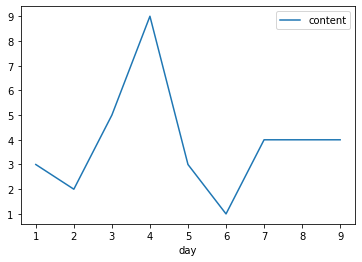

In [ ]:
tweets_rt_by_day = df[['content']].groupby(df['day']).count()
tweets_rt_by_day.plot()

In [ ]:
path=''

In [ ]:
df.to_csv(path+'busqueda.csv')